<a href="https://colab.research.google.com/github/bingsen-wang/Electric-Machines/blob/main/ElectricMachines_StatorLamination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Electric Machines: Stator</h1></b>

Dr. Bingsen Wang

8/6/2024
</center>

#Slot Dimensioning for Straight Tooth

Each slot-tooth angle is $\theta_{st}=\frac{2\pi}{n_s}$ with $n_s$ being the number of slots. The slot width is $w_{s1}$ at inner radius $r_i$. The too th width is
$$w_t = r_i\theta_{st} - w_{s1}\tag{1}$$

To keep the tooth straight, the slot width at $r_i+d_s$ is
$$w_{s2} = (r_i+d_s)\theta_{st} - w_t\tag{2}$$

Substituting (1) in (2) yields
$$w_{s2} = d_s\theta_{st} + w_{s1}\tag{3}$$



#Python Code
The Python code illustrates the stator of electric machines.

0
0
50
100
0


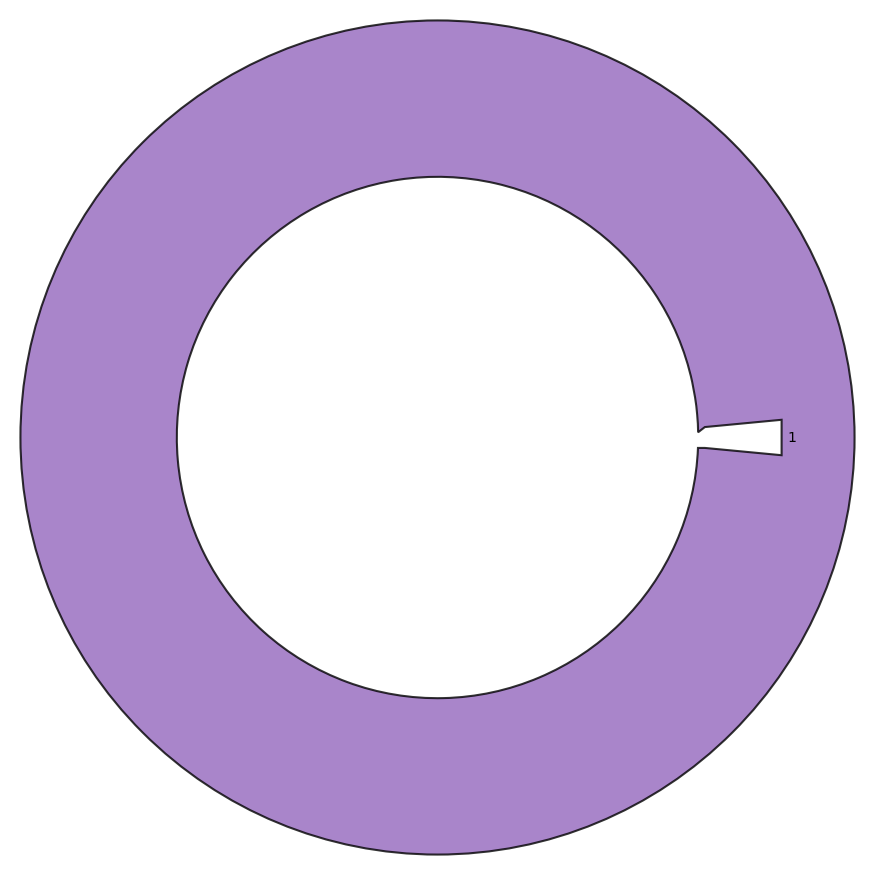

In [120]:
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp,angle,array,sqrt,arcsin
from numpy import heaviside as hs
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.patches import FancyArrow as fa
from matplotlib.path import Path
from matplotlib.patches import PathPatch,Arc,Circle
from matplotlib import animation,transforms,colors
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

def axis_reset(ax): #clear axis for redrawing
  xy=ax.axis(); ax.cla(); ax.axis('off'); ax.set(xlim=xy[:2],ylim=xy[-2:])
  return

def draw_stator_ss(ax,ro,ri,ns,nsp,ws,ds,fc='w',ec='k',lw=1,alpha=1): #straight slot
  """
  ro: outer radius
  ri: inner radius
  ns: number of slots
  nsp: number of slots to plot
  ws: slot width
  ds: slot depth
  """
  ax.add_patch(mp.Circle((0,0),ro,lw=lw,fc=fc,ec=ec,alpha=alpha))
  v,c=[],[]
  for k in range(ns):
    if k<nsp:
      pts = np.array([1+.08*ds/ri-1j*ws/(ri*2),1+ds/ri-1j*ws/(ri*2),1+ds/ri+1j*ws/(2*ri),1+.08*ds/ri+1j*ws/(2*ri)])*exp(1j*2*pi*k/ns)
      v.append(list(zip(pts.real,pts.imag))); c.extend([Path.LINETO]*5)
      v.append(Path.arc(360/ns*k+arcsin(ws/(4*ri))*180/pi,+360/ns*(k+1)-arcsin(ws/(4*ri))*180/pi).vertices)
      c.extend(Path.arc(360/ns*k+arcsin(ws/(4*ri))*180/pi,+360/ns*(k+1)-arcsin(ws/(4*ri))*180/pi).codes[1:])
      tr = transforms.Affine2D().rotate(2*pi/ns*k)+ax.transData
      ax.text(ri+ds+.1,0,str(k+1),va='center',ha='center',transform=tr)
    else:
      v.append(Path.arc(360/ns*nsp+arcsin(ws/(2*ri))*180/pi,360-arcsin(ws/(2*ri))*180/pi).vertices)
      c.extend([Path.LINETO])
      c.extend(Path.arc(360/ns*nsp+arcsin(ws/(2*ri))*180/pi,360-arcsin(ws/(2*ri))*180/pi).codes[1:])
      break

  tr = transforms.Affine2D().scale(ri)+ax.transData
  ax.add_patch(PathPatch(Path(list(np.vstack(v))+[[0,0]],([Path.MOVETO]+c[1:]+[Path.CLOSEPOLY])),
                         ec=colors.to_rgba(ec,alpha),fc='w',lw=lw,transform=tr))
  return

def draw_stator_st(ax,ro,ri,ns,nsp,ws,ds,fc='w',ec='k',lw=1,alpha=1): #straight teeth
  """
  ro: outer radius
  ri: inner radius
  ns: number of slots
  nsp: number of slots to plot
  ws: slot width
  ds: slot depth
  """
  ax.add_patch(mp.Circle((0,0),ro,lw=lw,fc=fc,ec=ec,alpha=alpha))
  v,c=[],[]
  for k in range(ns):
    if k<nsp:
      pts = np.array([1+.08*ds/ri-1j*ws/(ri*2),1+ds/ri-1j*(ws+ds*2*pi/ns)/(ri*2),1+ds/ri+1j*(ws+ds*2*pi/ns)/(2*ri),1+.08*ds/ri+1j*ws/(2*ri)])*exp(1j*2*pi*k/ns)
      v.append(list(zip(pts.real,pts.imag))); c.extend([Path.LINETO]*5)
      v.append(Path.arc(360/ns*k+arcsin(ws/(4*ri))*180/pi,+360/ns*(k+1)-arcsin(ws/(4*ri))*180/pi).vertices)
      c.extend(Path.arc(360/ns*k+arcsin(ws/(4*ri))*180/pi,+360/ns*(k+1)-arcsin(ws/(4*ri))*180/pi).codes[1:])
      tr = transforms.Affine2D().rotate(2*pi/ns*k)+ax.transData
      ax.text(ri+ds+.1,0,str(k+1),va='center',ha='center',transform=tr)
    else:
      v.append(Path.arc(360/ns*nsp+arcsin(ws/(2*ri))*180/pi,360-arcsin(ws/(2*ri))*180/pi).vertices)
      c.extend([Path.LINETO])
      c.extend(Path.arc(360/ns*nsp+arcsin(ws/(2*ri))*180/pi,360-arcsin(ws/(2*ri))*180/pi).codes[1:])
      break

  tr = transforms.Affine2D().scale(ri)+ax.transData
  ax.add_patch(PathPatch(Path(list(np.vstack(v))+[[0,0]],([Path.MOVETO]+c[1:]+[Path.CLOSEPOLY])),
                         ec=colors.to_rgba(ec,alpha),fc='w',lw=lw,transform=tr))
  return

def draw_stator_st_round(ax,ro,ri,ns,nsp,ws,ds,fc='w',ec='k',lw=1,alpha=1): #straight teeth, round slot bottom
  """
  ro: outer radius
  ri: inner radius
  ns: number of slots
  nsp: number of slots to plot
  ws: slot width
  ds: slot depth
  """
  ax.add_patch(mp.Circle((0,0),ro,lw=lw,fc=fc,ec=ec,alpha=alpha))
  v,c=[],[]
  for k in range(ns):
    if k<nsp:
      pts = np.array([1+.08*ds/ri-1j*ws/(ri*2),1+ds/ri-1j*(ws+ds*2*pi/ns)/(ri*2),1+1.3*ds/ri-1j*(ws+1.3*ds*2*pi/ns)/(ri*2),
                      1+1.3*ds/ri+1j*(ws+1.3*ds*2*pi/ns)/(2*ri),1+ds/ri+1j*(ws+ds*2*pi/ns)/(2*ri),1+.08*ds/ri+1j*ws/(2*ri)])*exp(1j*2*pi*k/ns)
      v.append(list(zip(pts.real,pts.imag))); c.extend([Path.LINETO]*2+[Path.CURVE4]*3+[Path.LINETO]*2)
      v.append(Path.arc(360/ns*k+arcsin(ws/(4*ri))*180/pi,+360/ns*(k+1)-arcsin(ws/(4*ri))*180/pi).vertices)
      c.extend(Path.arc(360/ns*k+arcsin(ws/(4*ri))*180/pi,+360/ns*(k+1)-arcsin(ws/(4*ri))*180/pi).codes[1:])
      tr = transforms.Affine2D().rotate(2*pi/ns*k)+ax.transData
      ax.text(ri+ds+.3,0,str(k+1),va='center',ha='center',transform=tr)
    else:
      v.append(Path.arc(360/ns*nsp+arcsin(ws/(2*ri))*180/pi,360-arcsin(ws/(2*ri))*180/pi).vertices)
      c.extend([Path.LINETO])
      c.extend(Path.arc(360/ns*nsp+arcsin(ws/(2*ri))*180/pi,360-arcsin(ws/(2*ri))*180/pi).codes[1:])
      break

  tr = transforms.Affine2D().scale(ri)+ax.transData
  ax.add_patch(PathPatch(Path(list(np.vstack(v))+[[0,0]],([Path.MOVETO]+c[1:]+[Path.CLOSEPOLY])),
                         ec=colors.to_rgba(ec,alpha),fc='w',lw=lw,transform=tr))
  return


#parameters
Nt = 36 #number of time tooth
Nfps = Nt #number of frames

#plotting
xylim = [[-4.1,4.1] for _ in range(2)]
clst=['tab:red','tab:blue','tab:olive','tab:purple','tab:green','tab:orange','k','w'] #colors light bg
fig = plt.figure(figsize=(9,9))
ax=fig.add_axes((.025,.025,.95,.95),xlim=xylim[0],ylim=xylim[1],fc='none')


# animation function. This is called sequentially
def animate(i):
  # i=23+Nt*2
  if i%50==0: print(i)
  ii=int(i/Nt)
  i=i%Nt
  axis_reset(ax) #clear axis
  if ii==0:
    draw_stator_st(ax,4,2.5,Nt,i+1,.2,.8,fc=clst[3],alpha=.8,lw=1.5)
  elif ii==1:
    draw_stator_ss(ax,4,2.5,Nt,i+1,.2,.8,fc=clst[2],alpha=.8,lw=1.5)
  else:
    draw_stator_st_round(ax,4,2.5,Nt,i+1,.2,.8,fc=clst[1],alpha=.8,lw=1.5)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nfps*3)
anim.save("ElectricMachine_StatorLamination.mp4", writer=animation.FFMpegWriter(fps=6),dpi = 200)